<a href="https://colab.research.google.com/github/mehdiaraghi/mehdiaraghi/blob/master/Price_Predictions_Using_Multilinear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data from Kaggle

In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rukenmissonnier/final-house")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rukenmissonnier/final-house/versions/4


In [20]:
import os

for file_name in os.listdir(path):
  print(file_name)

house.csv


In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv(os.path.join(path, file_name))

df.head(5)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


# data explanatory

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


In [23]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,3.732823,118.941327,1090.544301,105.665358,9.397168,48.576834,95701.196185
std,2.476989,95.469802,555.325830,60.750825,7.517018,27.621465,3919.823988
min,1.000000,10.244518,11.800000,1.245338,1.000000,0.000000,86113.592974
25%,2.000000,52.240659,635.897500,56.156897,2.000000,25.000000,92934.251436
50%,3.000000,91.828201,1143.135000,101.388012,8.000000,48.000000,95337.792918
75%,5.000000,150.987591,1554.280000,148.481068,16.000000,72.000000,97980.675094
max,17.000000,750.971604,1999.840000,330.275317,24.000000,97.000000,118134.771190


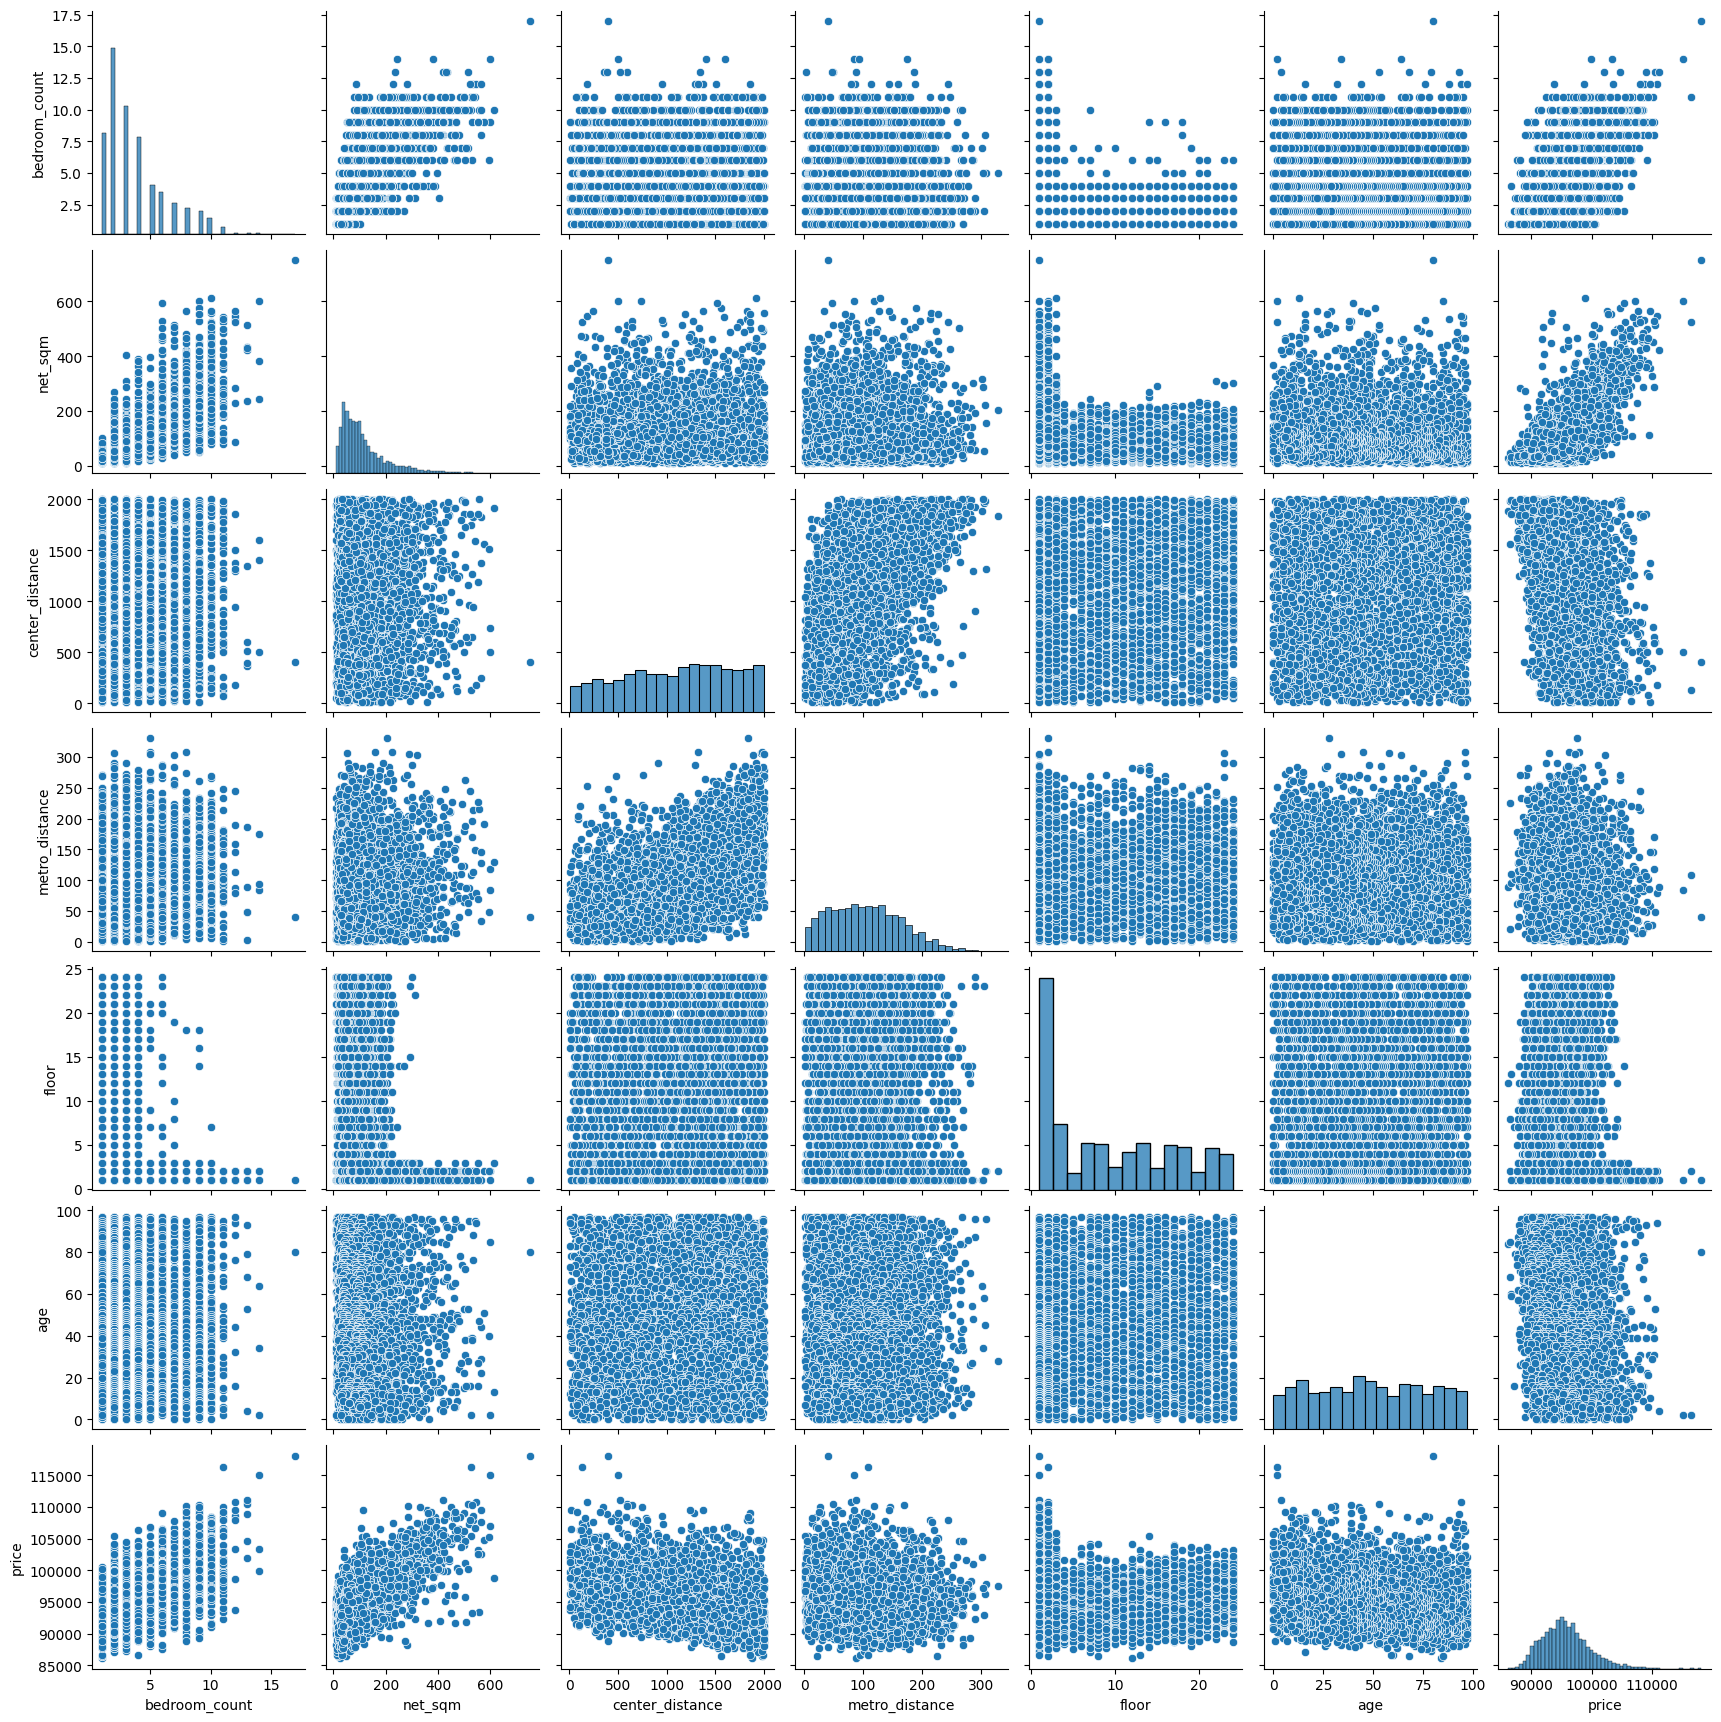

In [24]:
import seaborn as sns

sns.pairplot(df)

## sns.pairplot findings

shows relationships between multiple numerical variables. Here are some insights I can infer from the pattern of scatterplots and histograms:

**Price vs. Other Variables:**
Price appears to have a positive correlation with net square meters (net_sqm). This suggests that larger apartments tend to be more expensive.

Bedroom count (bedroom_count) also seems to influence price, with higher bedroom counts corresponding to higher prices.

Center distance (center_distance) does not show a clear linear correlation with price, but there may be a trend where properties further from the center have slightly lower prices.

**Net Square Meters vs. Other Variables:**

Strong positive correlation between net_sqm and bedroom_count. Larger apartments generally have more bedrooms.

There is some spread in how net_sqm relates to floor number (floor), but no clear pattern.

**Metro Distance (metro_distance) vs. Other Variables:**

Metro distance does not seem to have a strong correlation with price, but apartments closer to metro stations might have a slight tendency to be more expensive.

No strong link between metro_distance and bedroom_count.

**Floor Distribution:**

The histogram for floor suggests that most apartments are concentrated at lower floors.

There is no strong visible correlation between floor level and price.

**Age of Building (age):**

The age distribution appears uniform.

Older buildings do not necessarily seem to have lower prices.

No clear trend is visible between age and net_sqm or bedroom_count.

Overall, the strongest relationships appear to be:

Price vs. Net Square Meters (positive correlation)

Bedroom Count vs. Net Square Meters (positive correlation)

<Axes: >

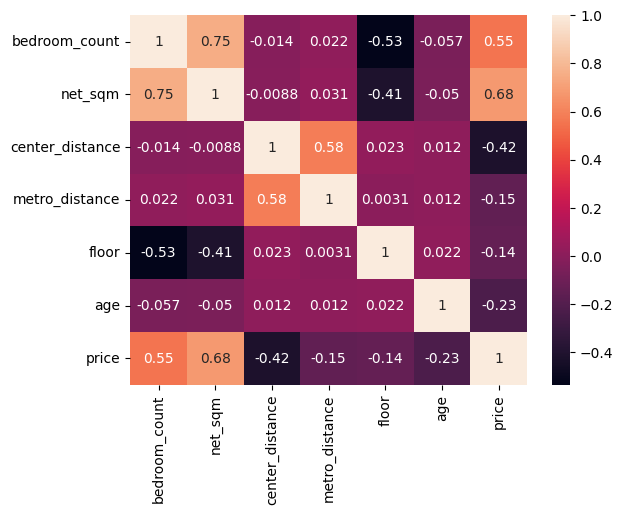

In [25]:
sns.heatmap(df.corr(), annot= True)

**🔍 Key Observations:**

Strong Positive Correlations:

price has a strong positive correlation with net_sqm (0.68) and bedroom_count (0.55), meaning larger properties with more bedrooms tend to be more expensive.

bedroom_count and net_sqm are highly correlated (0.75), which makes sense because larger properties typically have more bedrooms.

Negative Correlations:

price is negatively correlated with center_distance (-0.42), meaning properties further from the city center tend to be cheaper.

floor and bedroom_count (-0.53) suggest that apartments on higher floors tend to have fewer bedrooms (possibly due to building design constraints).

floor and net_sqm (-0.41) show a similar trend—higher floors likely have smaller apartments.

Weak or No Correlations:

age has a weak negative correlation with price (-0.23), meaning older properties tend to be slightly cheaper, but the effect is small.

metro_distance has almost no correlation with price (-0.15), suggesting proximity to a metro station doesn't strongly impact property prices.

<Axes: xlabel='price', ylabel='Count'>

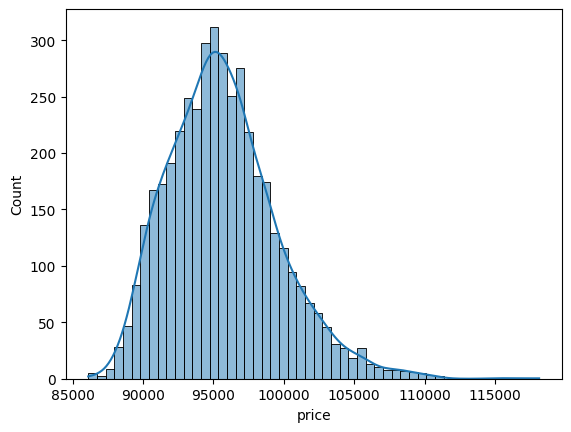

In [26]:
sns.histplot(data = df , x = 'price', kde = True)

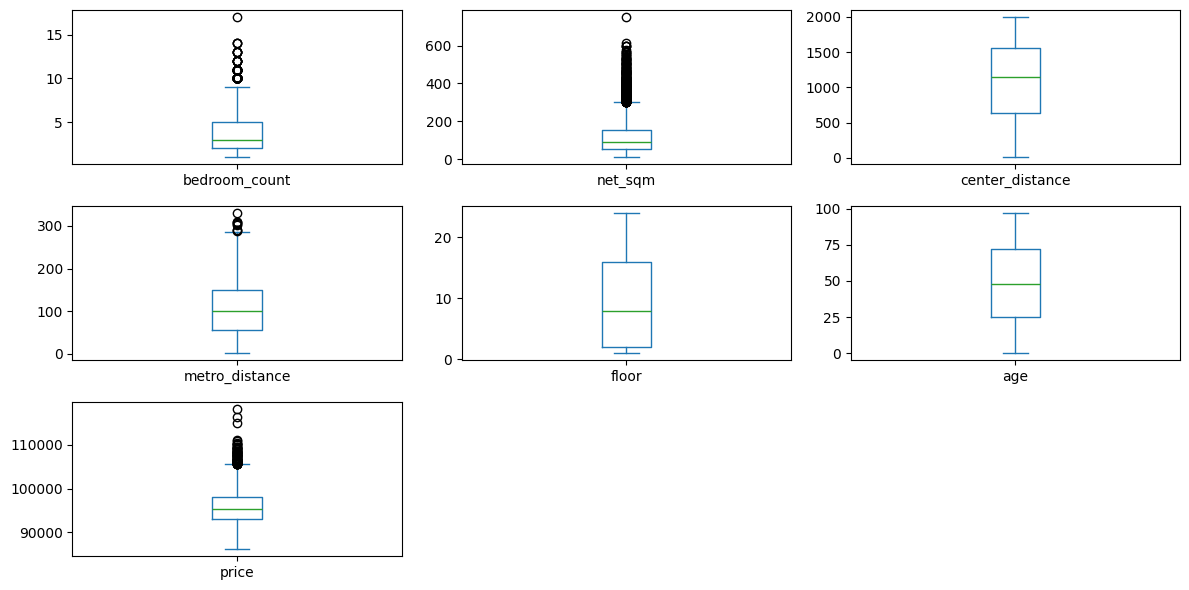

In [27]:
import matplotlib.pyplot as plt

# Get the number of numerical columns
num_columns = len(df.select_dtypes(include=np.number).columns)

# Adjust layout dynamically
rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calculate required rows

# Boxplots for all numerical columns
df.select_dtypes(include=np.number).plot(kind='box', subplots=True,
                                         layout=(rows, 3), figsize=(12, 6),
                                         sharex=False, sharey=False)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Prepare the dataset for predictions

In [28]:
df.columns

Index(['bedroom_count', 'net_sqm', 'center_distance', 'metro_distance',
       'floor', 'age', 'price'],
      dtype='object')

In [29]:
# create and preparing triaining set

X = df.drop(columns=['price'])

y = df['price']

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split (X, y, test_size = 0.4, random_state=42 )

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# Initialize the linear regression model
model = LinearRegression()

# Perform cross-validation (using 5 folds by default)
cv_results = cross_validate(model, X_train, y_train, cv=5, return_train_score=True)

print("Training scores for each fold:", cv_results['train_score'])
print("Validation scores for each fold:", cv_results['test_score'])

Training scores for each fold: [0.72441673 0.69465631 0.70813257 0.69478631 0.71120905]
Validation scores for each fold: [0.63390206 0.75316265 0.69846609 0.74541718 0.67998016]


We use transformations on heavy-tailed distributions to reduce skewness, make the data more normally distributed, and minimize the impact of extreme values. This helps improve the performance and stability of our model, especially for algorithms that assume normally distributed data, like linear regression.

In [32]:


sklearn_model = LinearRegression().fit(X_train,y_train)
sklearn_prediction = sklearn_model.predict(X_test)
sklearn_prediction.shape


(1724,)

In [33]:
sklearn_model.intercept_

np.float64(94651.49350900379)

In [34]:
pd.DataFrame(sklearn_model.coef_, X.columns, columns = ['Coeff'])

,Coeff
bedroom_count,326.262912
net_sqm,24.501164
center_distance,-3.377680
metro_distance,7.450159
floor,126.574706
age,-26.628986


In [35]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': sklearn_prediction})
reg_model_diff

,Actual value,Predicted value
151,90429.791221,92927.580341
3867,91026.059515,93020.902659
3164,96813.639519,96553.965032
2755,98810.323710,98331.464135
3450,98027.896979,98253.454141
...,...,...
1360,92082.938803,94085.506713
3961,90976.489534,91657.627834
367,91467.625748,93428.013650
3925,100035.310482,105340.613976


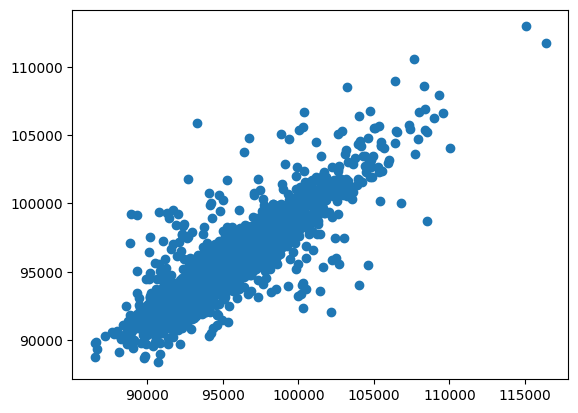

In [36]:
import matplotlib.pyplot as plt

plt.scatter(y_test, sklearn_prediction)

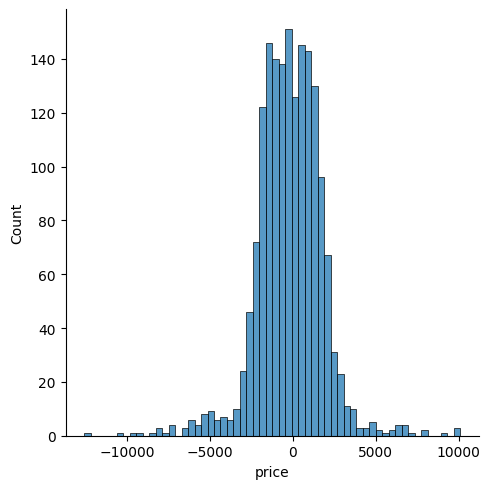

In [37]:
sns.displot((y_test-sklearn_prediction))

In [38]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, sklearn_prediction)
mse = metrics.mean_squared_error(y_test, sklearn_prediction)
r2 = np.sqrt(metrics.mean_squared_error(y_test, sklearn_prediction))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 1471.3503672266409
Mean Square Error: 4058330.769161722
Root Mean Square Error: 2014.5299126996656


# Result analysis


To determine whether your MAE, MSE, and RMSE values are good and acceptable, you should compare them against several benchmarks:



In [39]:
print("Mean Price:", y_test.mean())
print("Standard Deviation of Price:", y_test.std())


y_baseline = [y_test.mean()] * len(y_test)
baseline_mae = metrics.mean_absolute_error(y_test, y_baseline)
print("Baseline MAE:", baseline_mae)


r2 = metrics.r2_score(y_test, sklearn_prediction)
print("R² Score:", r2)


Mean Price: 95495.42787993376
Standard Deviation of Price: 3912.6417252347114
Baseline MAE: 3040.4862263498453
R² Score: 0.734747637452657


**Model Performance Report**

1️⃣ Mean Absolute Error (MAE): 1,471, which is significantly lower than the baseline MAE (3,040), indicating strong predictive accuracy.

2️⃣ Root Mean Square Error (RMSE): 2,014, which is well below the price standard deviation (3,912), meaning errors are within typical fluctuations.

3️⃣ R² Score: 0.73, showing that the model explains 73% of the variance in price, making it a reliable predictor.

4️⃣ Model vs. Baseline: The model reduces prediction error by over 50% compared to the baseline, proving its effectiveness.

5️⃣ Conclusion: The model performs well, but further improvements (e.g., feature engineering or non-linear models) could enhance accuracy. 🚀